# Project 2: Topic Classification

In this project, you'll work with text data from newsgroup postings on a variety of topics. You'll train classifiers to distinguish between the topics based on the text of the posts. Whereas with digit classification, the input is relatively dense: a 28x28 matrix of pixels, many of which are non-zero, here we'll represent each document with a "bag-of-words" model. As you'll see, this makes the feature representation quite sparse -- only a few words of the total vocabulary are active in any given document. The bag-of-words assumption here is that the label depends only on the words; their order is not important.

The SK-learn documentation on feature extraction will prove useful:
http://scikit-learn.org/stable/modules/feature_extraction.html

Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [0]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib.pyplot as plt

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# SK-learn library for importing the newsgroup data.
from sklearn.datasets import fetch_20newsgroups

# SK-learn libraries for feature extraction from text.
from sklearn.feature_extraction.text import *

import nltk

Load the data, stripping out metadata so that we learn classifiers that only use textual features. By default, newsgroups data is split into train and test sets. We further split the test so we have a dev set. Note that we specify 4 categories to use for this project. If you remove the categories argument from the fetch function, you'll get all 20 categories.

In [10]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train',
                                      remove=('headers', 'footers', 'quotes'),
                                      categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test',
                                     remove=('headers', 'footers', 'quotes'),
                                     categories=categories)

num_test = int(len(newsgroups_test.target) / 2)
test_data, test_labels = newsgroups_test.data[num_test:], newsgroups_test.target[num_test:]
dev_data, dev_labels = newsgroups_test.data[:num_test], newsgroups_test.target[:num_test]
train_data, train_labels = newsgroups_train.data, newsgroups_train.target

print('training label shape:', train_labels.shape)
print('test label shape:', test_labels.shape)
print('dev label shape:', dev_labels.shape)
print('labels names:', newsgroups_train.target_names)

training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
training label shape: (2034,)
test label shape: (677,)
dev label shape: (676,)
labels names: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


### Part 1:

For each of the first 5 training examples, print the text of the message along with the label.

In [11]:
def P1(num_examples=5):
### STUDENT START ###

  for i,v in enumerate(train_data[0:num_examples]):
    print("*****Category of Message @ index " + str(i) + ": " +  str(categories[train_labels[i]]) + "*****")  
    print("*****Text of Message @ index " + str(i) + ":" + "*****" + " \n")
    print(v)
    
### STUDENT END ###
P1()

*****Category of Message @ index 0: talk.religion.misc*****
*****Text of Message @ index 0:***** 

Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
*****Category of Message @ index 1: sci.space*****
*****Text of Message @ index 1:***** 



Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delus

### Part 2:

Use CountVectorizer to turn the raw training text into feature vectors. You should use the fit_transform function, which makes 2 passes through the data: first it computes the vocabulary ("fit"), second it converts the raw text into feature vectors using the vocabulary ("transform").

The vectorizer has a lot of options. To get familiar with some of them, write code to answer these questions:

a. The output of the transform (also of fit_transform) is a sparse matrix: http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.sparse.csr_matrix.html. What is the size of the vocabulary? What is the average number of non-zero features per example? What fraction of the entries in the matrix are non-zero? Hint: use "nnz" and "shape" attributes.

b. What are the 0th and last feature strings (in alphabetical order)? Hint: use the vectorizer's get_feature_names function.

c. Specify your own vocabulary with 4 words: ["atheism", "graphics", "space", "religion"]. Confirm the training vectors are appropriately shaped. Now what's the average number of non-zero features per example?

d. Instead of extracting unigram word features, use "analyzer" and "ngram_range" to extract bigram and trigram character features. What size vocabulary does this yield?

e. Use the "min_df" argument to prune words that appear in fewer than 10 documents. What size vocabulary does this yield?

f. Using the standard CountVectorizer, what fraction of the words in the dev data are missing from the vocabulary? Hint: build a vocabulary for both train and dev and look at the size of the difference.

In [12]:
def P2():
  ### STUDENT START ###
  vectorizer = CountVectorizer()

  feature_vectors = vectorizer.fit_transform(train_data)

  ####A####

  print("A")

  #What is the size of the vocabulary?
  print("Size of vocabulary: " + str(len(vectorizer.get_feature_names())))

  features = feature_vectors.shape[0]
  examples = feature_vectors.shape[1]
  
  non_zero_features = 0 #count number of train_data entries that has non zero features
  non_zero_feature_array_count = 0 #if train data feature is not zero, append to this array to calculate average
  for i in feature_vectors:
    if i.nnz > 0:
      non_zero_features += 1 #sum number of non_zero_features
      non_zero_feature_array_count += i.nnz

  #What is the average number of non-zero features per example?

  average_number_of_non_zero_features = non_zero_feature_array_count / features
  print("Average number of non-zero features per example: " + str(average_number_of_non_zero_features))

  #What fraction of the entries in the matrix are non-zero
  pct_of_non_zero_features = (feature_vectors.nnz / (features * examples))
  print("Fraction of entries in the matrix which are non-zero: " + str(pct_of_non_zero_features))

  ####B####

  print("B")
  print("0th feature string: " + vectorizer.get_feature_names()[0])
  print("Last feature string: " + vectorizer.get_feature_names()[-1])

  ####C####
  print("C")
  #print(vocabulary)
  vectorizer_C = CountVectorizer(vocabulary = ["atheism", "graphics", "space", "religion"])
  feature_vectors_C = vectorizer_C.fit_transform(train_data)


  #What is the average number of non-zero features per example?
  print("Average number of non-zero features per example: " + str(feature_vectors_C.nnz/len(train_data)))

  ####D####
  print("D")
  vectorizer_D = CountVectorizer(ngram_range=(2,3), analyzer = 'char')
  feature_vectors_D = vectorizer_D.fit(train_data)
  print("Size of vocabulary utilizing bigram/trigrams character features: " + str(len(feature_vectors_D.vocabulary_)))

  ####E####
  print("E")
  vectorizer_E = CountVectorizer(min_df = 10)
  feature_vectors_E = vectorizer_E.fit_transform(train_data)
  print("Vocabulary size after pruning words that appear in fewer than 10 documents: " + str(len(vectorizer_E.get_feature_names())))

  ####F####
  print("F")

  #train
  
  vectorizer_F_0 = CountVectorizer()
  feature_vectors_F_0 = vectorizer_F_0.fit_transform(train_data)

  train_vocab_size = len(vectorizer_F_0.vocabulary_)
  
  
  #overall vocabulary
  vectorizer_F_1 = CountVectorizer()
  feature_vectors_F_1 = vectorizer_F_1.fit_transform(train_data+dev_data)

  overall_vocab_size = len(vectorizer_F_1.vocabulary_)

  #dev_data

  vectorizer_F_2 = CountVectorizer()
  feature_vectors_F_2 = vectorizer_F_2.fit_transform(dev_data)

  dev_data_vocab_size = len(vectorizer_F_2.vocabulary_)

  print("Fraction of words missing from dev data from overall vocabulary: " + str((overall_vocab_size - train_vocab_size)/dev_data_vocab_size)) 


### STUDENT END ###
P2()

A
Size of vocabulary: 26879
Average number of non-zero features per example: 96.70599803343165
Fraction of entries in the matrix which are non-zero: 0.0035978272269590263
B
0th feature string: 00
Last feature string: zyxel
C
Average number of non-zero features per example: 0.26843657817109146
D
Size of vocabulary utilizing bigram/trigrams character features: 35478
E
Vocabulary size after pruning words that appear in fewer than 10 documents: 3064
F
Fraction of words missing from dev data from overall vocabulary: 0.24787640034470024
A
Size of vocabulary: 26879
Average number of non-zero features per example: 96.70599803343165
Fraction of entries in the matrix which are non-zero: 0.0035978272269590263
B
0th feature string: 00
Last feature string: zyxel
C
Average number of non-zero features per example: 0.26843657817109146
D
Size of vocabulary utilizing bigram/trigrams character features: 35478
E
Vocabulary size after pruning words that appear in fewer than 10 documents: 3064
F
Fraction of

### Part 3:

Use the default CountVectorizer options and report the f1 score (use metrics.f1_score with average="weighted") for a k nearest neighbors classifier; find the optimal value for k. Also fit a Multinomial Naive Bayes model and find the optimal value for alpha. Finally, fit a logistic regression model and find the optimal value for the regularization strength C using l2 regularization. A few questions:

* Why doesn't nearest neighbors work well for this problem?
* Any ideas why logistic regression doesn't work as well as Naive Bayes?
* Logistic regression estimates a weight vector for each class, which you can access with the coef\_ attribute. Output the sum of the squared weight values for each class for each setting of the C parameter. Briefly explain the relationship between the sum and the value of C.

Values of neighbors being tested for KNN: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
F1 score for KNN: 0.45047910006117586
Best Estimator for # of neighbors with k nearest neighbors: 7
Values of alphas being tested for multinomial: [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
F1 score of Multinomial: 0.7751663218544357
Best Estimator for alpha with Multinomial Naive Bayes: 0.01
Values of C being tested for multinomial: [0.001, 0.01, 0.05, 0.1, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 5, 10, 25, 50, 75, 100]
F1 score of Logistic: 0.7084739776490449
Best Estimator for C with Logistic regression, L2 regularization: 0.5


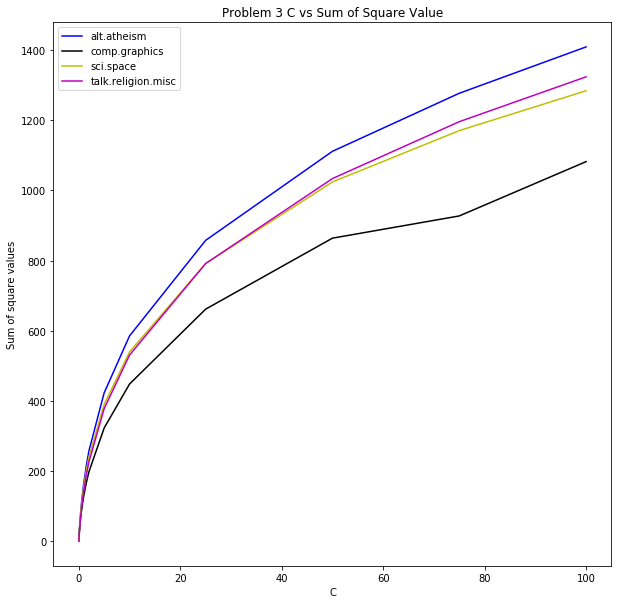

Values of neighbors being tested for KNN: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
F1 score for KNN: 0.45047910006117586
Best Estimator for # of neighbors with k nearest neighbors: 7
Values of alphas being tested for multinomial: [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
F1 score of Multinomial: 0.7751663218544357
Best Estimator for alpha with Multinomial Naive Bayes: 0.01
Values of C being tested for multinomial: [0.001, 0.01, 0.05, 0.1, 0.15, 0.18, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 5, 10, 25, 50, 75, 100]
F1 score of Logistic: 0.7084739776490449
Best Estimator for C with Logistic regression, L2 regularization: 0.5


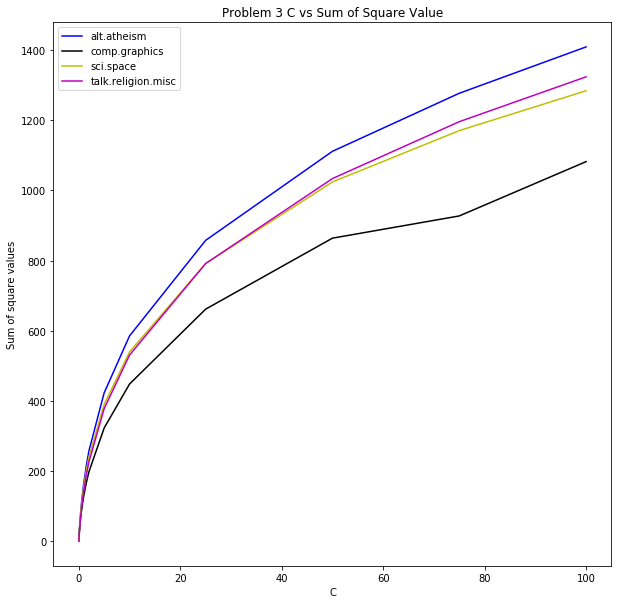

In [13]:
from sklearn.model_selection import GridSearchCV
import pandas as pd #for outputting table

def P3():
### STUDENT START ###

  ###KNN###
  vectorizer_3 = CountVectorizer()

  bag_of_words_train = vectorizer_3.fit_transform(train_data)
  bag_of_words_dev = vectorizer_3.transform(dev_data)
  
  
  #values of neighbors we're testing
  neighbors_list = [i + 1 for i in range(0,10)]
  
  print("Values of neighbors being tested for KNN: " + str(neighbors_list))
  
  knn_param_grid  = {'n_neighbors': neighbors_list} #set values of alpha
  
  knn = KNeighborsClassifier() #initialize model
  
  knn_gscv = GridSearchCV(knn, param_grid = knn_param_grid, cv=5) #perform gridsearch cv on multinomial

  knn_gscv.fit(bag_of_words_train, train_labels)
  prediction_knn = knn_gscv.predict(bag_of_words_dev)
  
  print("F1 score for KNN: " + str(metrics.f1_score(dev_labels, prediction_knn, average='weighted')))
  print("Best Estimator for # of neighbors with k nearest neighbors: " + str((knn_gscv.best_estimator_.n_neighbors)))

  ###Multinomial###
  
  #values of alpha we want to find
  alpha_list = [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]
  
  multinomial_param_grid = {'alpha': alpha_list} #set values of alpha

  print("Values of alphas being tested for multinomial: " + str(alpha_list))  
  
  multinomial = MultinomialNB() #initialize multinomial

  multinomial_gscv = GridSearchCV(multinomial, param_grid = multinomial_param_grid, cv=5) #perform gridsearch cv on multinomial
  
  multinomial_gscv.fit(bag_of_words_train, train_labels)

  prediction_multinomial = multinomial_gscv.predict(bag_of_words_dev)
  
  print("F1 score of Multinomial: " + str(metrics.f1_score(dev_labels, prediction_multinomial, average='weighted')))
  print("Best Estimator for alpha with Multinomial Naive Bayes: " + str((multinomial_gscv.best_estimator_.alpha)))
  
  ###Logistic###
  
  C_list = [0.001, 0.01, .05, .1, .15, .18, .2, .3, .4, .5, .6, .7, .8, .9, 1, 1.5, 2, 5, 10, 25, 50, 75, 100] #pass in various paramaters for C
  
  #C_list = [ 0.5, 1 ]
  
  C_list.sort()
  
  logistic_param_grid = { 'C': C_list } 
  
  logistic = LogisticRegression(penalty='l2', solver = 'liblinear', multi_class = 'auto')
  
  print("Values of C being tested for multinomial: " + str(C_list))  
  
  logistic_gscv = GridSearchCV(logistic, param_grid = logistic_param_grid, cv=5)

  logistic_gscv.fit(bag_of_words_train, train_labels)
  
  prediction_logistic = logistic_gscv.predict(bag_of_words_dev)
  
  print("F1 score of Logistic: " + str(metrics.f1_score(dev_labels, prediction_logistic, average='weighted')))
  print("Best Estimator for C with Logistic regression, L2 regularization: " + str((logistic_gscv.best_estimator_.C)))
  
  #output sum of square values for each category for each setting of C
  
  #initialize list to append to
  sos_index0 = []
  sos_index1 = []  
  sos_index2 = []
  sos_index3 = []
  
  #loop through and calculate sum of squares from weights
  for C_value in C_list:
    logistic_loop = LogisticRegression(penalty='l2', solver = 'liblinear', multi_class = 'auto', C = C_value)
    logistic_loop.fit(bag_of_words_train, train_labels)
    sos_index0.append(np.sum(logistic_loop.coef_[0]**2).astype(float))
    sos_index1.append(np.sum(logistic_loop.coef_[1]**2).astype(float))
    sos_index2.append(np.sum(logistic_loop.coef_[2]**2).astype(float))
    sos_index3.append(np.sum(logistic_loop.coef_[3]**2).astype(float))
  
  #####Making plot for C vs sum of square to visualize relationship#####

  fig, ax = plt.subplots() #plot size
  fig.set_size_inches(10, 10)
  ax.set_title("Problem 3 C vs Sum of Square Value") #superimposed plot title
  ax.set_xlabel('C')
  ax.set_ylabel('Sum of square values')

  #setting arrays
  x1 = np.array(C_list)
  y0 = np.array(sos_index0)
  y1 = np.array(sos_index1)
  y2 = np.array(sos_index2)
  y3 = np.array(sos_index3)
  
  #plot lines
  ax.plot(x1,y0, '-b', label = 'alt.atheism')
  ax.plot(x1,y1, '-k', label = 'comp.graphics')
  ax.plot(x1,y2, '-y', label = 'sci.space')
  ax.plot(x1,y3, '-m', label = 'talk.religion.misc')
  ax.legend(loc='upper left') #legend location


### STUDENT END ###
P3()

ANSWER: 

Why KNN might not work so well: K Nearest Neighbors will look for the most similar items in our train data and only utilize those points to classify the dev/train example. In this instance, GridSearchCV found that 7 neighbors provided the best performance. However, there are likely many words that are outside of the 7 closest examples that could help lead to better classification. Additionally, we have over 25000 features in our model (much higher than the 784 features from project 1), so KNN might be suffering from the curse of dimensionality. 

Why logistic regression might not work as well as Naive Bayes: This might be due to the fact that Naive Bayes is a generative model, whereas logistic regression is a discriminitive model. 

This paper by Andrew Ng highlights the issue: http://ai.stanford.edu/~ang/papers/nips01-discriminativegenerative.pdf

A generative model reaches its asymptotic faster (O(log n)) compared to the discriminative model (O(n)). It may be the case as we increase the size of our training/test sets, we will see better performance with the logistic regression model.


Sum of Square Values: The sum of square values appear to increase with relation to C. The increase in sum of square values appears to be quite drastic at first, and then appears to taper off slightly.

### Part 4:

Train a logistic regression model. Find the 5 features with the largest weights for each label -- 20 features in total. Create a table with 20 rows and 4 columns that shows the weight for each of these features for each of the labels. Create the table again with bigram features. Any surprising features in this table?

In [14]:
import pandas as pd #for outputting table

def P4():
### STUDENT START ###
  import pandas as pd #for outputting table
  vectorizer_4 = CountVectorizer()

  bag_of_words_train = vectorizer_4.fit_transform(raw_documents=train_data)
  logistic = LogisticRegression(penalty='l2', C=0.5, solver = 'liblinear', multi_class = 'auto')
  logistic.fit(bag_of_words_train, train_labels)
  
  master_list = []
  top_words = []
  index_list = []
  label_0_weights = []
  label_1_weights = []
  label_2_weights = []
  label_3_weights = []
  feature_names = vectorizer_4.get_feature_names()
  
  #top feature list
  for j in logistic.coef_:
    weight_index_list = []
    #loop through the weights for each label
    for i, v in np.ndenumerate(j):
      index = i[0]
      value = v.tolist()
      weight_index_list.append((index, value)) #append the index and values into a tuple
    sorted_by_weight = sorted(weight_index_list, key=lambda tup: tup[1], reverse=True)[0:5] #sort appended list by feature, return top 5 words for each feature
    for i in sorted_by_weight:
      top_words.append(feature_names[i[0]]) 
      index_list.append(i[0])
      label_0_weights.append(logistic.coef_[0][i[0]])
      label_1_weights.append(logistic.coef_[1][i[0]])
      label_2_weights.append(logistic.coef_[2][i[0]])
      label_3_weights.append(logistic.coef_[3][i[0]])
    
    master_list.append(sorted_by_weight)
  
  #display options for pandas to show table nicely
  pd.set_option('display.max_columns', 500)
  pd.set_option('display.width', 1000)
  
  #initialize data structure to output to table
  table_data = {'top_words': top_words, 'index': index_list, 'alt.atheism': label_0_weights, 'comp.graphics': label_1_weights , 'sci.space': label_2_weights, 'talk.religion.misc' : label_3_weights}
  table_data_df = pd.DataFrame.from_dict(table_data)
  
  print("5 Features With the Largest Weights for Each Label - Unigram Features")
  print(table_data_df)
  
  ####Bigram features#####
  
  vectorizer_bi = CountVectorizer(ngram_range=(2,2), analyzer = 'word')

  feature_vectors_bi = vectorizer_bi.fit_transform(raw_documents=train_data)
  
  #print("Size of vocabulary utilizing bigram/trigrams: " + str(len(feature_vectors_D.vocabulary_)))
  logistic_bi = LogisticRegression(penalty='l2', C=0.5, solver = 'liblinear', multi_class = 'auto')
  logistic_bi.fit(feature_vectors_bi, train_labels)

  master_list_bi = []
  top_words_bi = []
  index_list_bi = []
  label_0_weights_bi = []
  label_1_weights_bi = []
  label_2_weights_bi = []
  label_3_weights_bi = []
  feature_names_bi = vectorizer_bi.get_feature_names()
  
  #top feature list
  for j in logistic_bi.coef_:
    weight_index_list_bi = []
    for i, v in np.ndenumerate(j):
      index = i[0]
      value = v.tolist()
      weight_index_list_bi.append((index, value))
    sorted_by_weight = sorted(weight_index_list_bi, key=lambda tup: tup[1], reverse=True)[0:5] #sort appended list by feature, top 5 words for each feature
    for i in sorted_by_weight:
      top_words_bi.append(feature_names_bi[i[0]]) 
      index_list_bi.append(i[0])
      label_0_weights_bi.append(logistic_bi.coef_[0][i[0]])
      label_1_weights_bi.append(logistic_bi.coef_[1][i[0]])
      label_2_weights_bi.append(logistic_bi.coef_[2][i[0]])
      label_3_weights_bi.append(logistic_bi.coef_[3][i[0]])
  
  #initialize data structure to output to table    
  table_data_bi = {'top_bigrams': top_words_bi, 'index': index_list_bi, 'alt.atheism': label_0_weights_bi, 'comp.graphics': label_1_weights_bi , 'sci.space': label_2_weights_bi, 'talk.religion.misc' : label_3_weights_bi}
  table_data_bi_df = pd.DataFrame.from_dict(table_data_bi)

  
  print("5 Features With the Largest Weights for Each Label - Bigram Features")
  print(table_data_bi_df)
### STUDENT END ###
P4()

5 Features With the Largest Weights for Each Label - Unigram Features
     top_words  index  alt.atheism  comp.graphics  sci.space  talk.religion.misc
0     atheists   3870     0.834079      -0.093278  -0.267135           -0.637584
1        bobby   4784     0.823487      -0.191203  -0.286601           -0.387215
2     religion  20430     0.798326      -0.508674  -0.658639           -0.050572
3      atheism   3866     0.794657      -0.348390  -0.367117           -0.376962
4     deletion   7841     0.723701      -0.249534  -0.272859           -0.270338
5     graphics  11552    -0.640823       1.626464  -1.102965           -0.626394
6        image  12769    -0.469510       1.116863  -0.671940           -0.380667
7         file  10376    -0.275264       1.058962  -0.682563           -0.506271
8           3d   1145    -0.303459       0.941456  -0.571148           -0.317605
9     computer   6555     0.071414       0.843795  -0.569558           -0.396213
10       space  22567    -1.061307     

ANSWER: It is interesting that "bobby" is one of the strongest features for atheism. additionally, it seems interesting that under religion, one of the strongest words/features is FBI. 

It also appears that a lot of our strongest weights are "stop words". For instance, when utilizing bigram features, we get several pretty seemingly generic bigrams, such as "you are". It may be worth utilizing stop words and looking at the top unigrams/bigrams/trigrams again. 

Furthermore, it's interesting how "christians" and "christian" are two of the strongest weights for talk.religion.misc. It may be worth trying lemmatization to improve performance.

### Part 5:

Try to improve the logistic regression classifier by passing a custom preprocessor to CountVectorizer. The preprocessing function runs on the raw text, before it is split into words by the tokenizer. Your preprocessor should try to normalize the input in various ways to improve generalization. For example, try lowercasing everything, replacing sequences of numbers with a single token, removing various other non-letter characters, and shortening long words. If you're not already familiar with regular expressions for manipulating strings, see https://docs.python.org/2/library/re.html, and re.sub() in particular. With your new preprocessor, how much did you reduce the size of the dictionary?

For reference, I was able to improve dev F1 by 2 points.

In [15]:
def empty_preprocessor(s):
    return s

def better_preprocessor(s):
### STUDENT START ###
    #applying different text transformations suggested by the question
    s = s.lower() #lower case
    s = re.sub('[^A-Za-z0-9]', ' ', s) #remove non alpha numeric characters
    s = re.sub('[/\r?\n|\r/]', ' ', s) #remove line breaks
    s = re.sub("(\w{7})\w+", "\\1", s) #shortening long words
    s = re.sub('([0-9]+)', '#', s) #numbers
    return s
 
### STUDENT END ###

def P5():
### STUDENT START ###
  
  train_data2 = train_data.copy() #create a copy to apply pruning to

  #apply preprocessing to each item
  for i, v in enumerate(train_data2):
    train_data2[i] = better_preprocessor(v)
  
  #print(train_data2[1])
  dev_data2 = dev_data.copy() #create a copy to apply pruning to
 
  #apply preprocessing to each item
  for i, v in enumerate(dev_data2):
    dev_data2[i] = better_preprocessor(v)

  #####train data#####
    
  vectorizer = CountVectorizer()

  feature_vectors_train = vectorizer.fit_transform(raw_documents=train_data) #fit transform train data
  feature_vectors_dev = vectorizer.transform(raw_documents=dev_data) #fit transform dev data

  #What is the size of the vocabulary?
  print("Size of vocabulary: " + str(len(vectorizer.get_feature_names())))
 
  #####processed training/dev data#####
  
  vectorizer_prune = CountVectorizer()

  feature_vectors_train_prune = vectorizer_prune.fit_transform(raw_documents=train_data2) #fit transform processed train data
  feature_vectors_dev_prune = vectorizer_prune.transform(raw_documents=dev_data2) #fit transform processed dev data
  #What is the size of the vocabulary?
  print("Size of vocabulary after applying preprocessor: " + str(len(vectorizer_prune.get_feature_names()))) 
  
  ##run logistic regression with normal trained data
  vectorizer_5 = CountVectorizer()

  logistic = LogisticRegression(penalty='l2', C=.5, solver = 'liblinear', multi_class = 'auto')

  logistic.fit(feature_vectors_train, train_labels)
  
  prediction_logistic = logistic.predict(feature_vectors_dev)
  
  print("F1 score of Logistic (no pruned data): " + str(metrics.f1_score(dev_labels, prediction_logistic, average='weighted')))
  
  ##run logistic regression with pruned data
  vectorizer_5_prune = CountVectorizer()

  logistic_prune = LogisticRegression(penalty='l2', C=.5, solver = 'liblinear', multi_class = 'auto')

  logistic_prune.fit(feature_vectors_train_prune, train_labels)
  
  prediction_logistic_prune = logistic_prune.predict(feature_vectors_dev_prune)
  
  print("F1 score of Logistic using pruned data: " + str(metrics.f1_score(dev_labels, prediction_logistic_prune, average='weighted')))
  
  print("Dictionary was reduced by " + str((1-len(vectorizer_prune.get_feature_names())/len(vectorizer.get_feature_names()))*100) + " percent via the preprocessor.")
  
### STUDENT END ###
P5()

Size of vocabulary: 26879
Size of vocabulary after applying preprocessor: 19730
F1 score of Logistic (no pruned data): 0.7084739776490449
F1 score of Logistic using pruned data: 0.7169298999479145
Dictionary was reduced by 26.596971613527288 percent via the preprocessor.
Size of vocabulary: 26879
Size of vocabulary after applying preprocessor: 19730
F1 score of Logistic (no pruned data): 0.7084739776490449
F1 score of Logistic using pruned data: 0.7169298999479145
Dictionary was reduced by 26.596971613527288 percent via the preprocessor.


### Part 6:

The idea of regularization is to avoid learning very large weights (which are likely to fit the training data, but not generalize well) by adding a penalty to the total size of the learned weights. That is, logistic regression seeks the set of weights that minimizes errors in the training data AND has a small size. The default regularization, L2, computes this size as the sum of the squared weights (see P3, above). L1 regularization computes this size as the sum of the absolute values of the weights. The result is that whereas L2 regularization makes all the weights relatively small, L1 regularization drives lots of the weights to 0, effectively removing unimportant features.

Train a logistic regression model using a "l1" penalty. Output the number of learned weights that are not equal to zero. How does this compare to the number of non-zero weights you get with "l2"? Now, reduce the size of the vocabulary by keeping only those features that have at least one non-zero weight and retrain a model using "l2".

Make a plot showing accuracy of the re-trained model vs. the vocabulary size you get when pruning unused features by adjusting the C parameter.

Note: The gradient descent code that trains the logistic regression model sometimes has trouble converging with extreme settings of the C parameter. Relax the convergence criteria by setting tol=.015 (the default is .0001).

***Parameters being fed in***
C Values: [0.001, 0.01, 0.1, 0.5, 1.0, 10, 25, 50, 75, 100]
tol value set to: 0.015
solver type set to: liblinear
*****C Value: 0.001*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 2
F1 score of Logistic L1: 0.24492835290439324
F1 score of Logistic L2 (with pruned vocabulary): 0.30957140795868543
*****C Value: 0.01*****


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Unpruned vocabulary size: 26879
Pruned vocabulary size: 18
F1 score of Logistic L1: 0.4246881330066089
F1 score of Logistic L2 (with pruned vocabulary): 0.46057267958021114
*****C Value: 0.1*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 221
F1 score of Logistic L1: 0.6457418448319417
F1 score of Logistic L2 (with pruned vocabulary): 0.6779407975043672
*****C Value: 0.5*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 739
F1 score of Logistic L1: 0.6928900489693511
F1 score of Logistic L2 (with pruned vocabulary): 0.6714990682695503
*****C Value: 1.0*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 1169
F1 score of Logistic L1: 0.6915604469754268
F1 score of Logistic L2 (with pruned vocabulary): 0.6780732531113114
*****C Value: 10*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 3577
F1 score of Logistic L1: 0.6657529269056198
F1 score of Logistic L2 (with pruned vocabulary): 0.703160561535995
*****C Value: 25*****
Unpruned vocabulary s

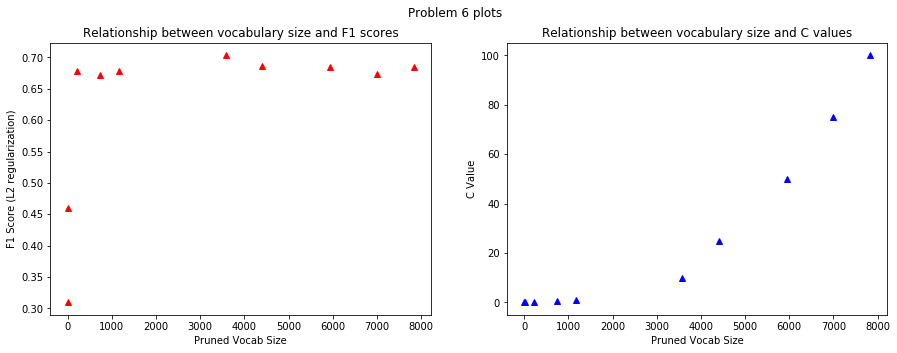

***Parameters being fed in***
C Values: [0.001, 0.01, 0.1, 0.5, 1.0, 10, 25, 50, 75, 100]
tol value set to: 0.015
solver type set to: liblinear
*****C Value: 0.001*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 2
F1 score of Logistic L1: 0.24492835290439324
F1 score of Logistic L2 (with pruned vocabulary): 0.30957140795868543
*****C Value: 0.01*****


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Unpruned vocabulary size: 26879
Pruned vocabulary size: 18
F1 score of Logistic L1: 0.4246881330066089
F1 score of Logistic L2 (with pruned vocabulary): 0.46057267958021114
*****C Value: 0.1*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 221
F1 score of Logistic L1: 0.6457418448319417
F1 score of Logistic L2 (with pruned vocabulary): 0.6779407975043672
*****C Value: 0.5*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 739
F1 score of Logistic L1: 0.6928900489693511
F1 score of Logistic L2 (with pruned vocabulary): 0.6714990682695503
*****C Value: 1.0*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 1169
F1 score of Logistic L1: 0.6915604469754268
F1 score of Logistic L2 (with pruned vocabulary): 0.6780732531113114
*****C Value: 10*****
Unpruned vocabulary size: 26879
Pruned vocabulary size: 3577
F1 score of Logistic L1: 0.6657529269056198
F1 score of Logistic L2 (with pruned vocabulary): 0.703160561535995
*****C Value: 25*****
Unpruned vocabulary s

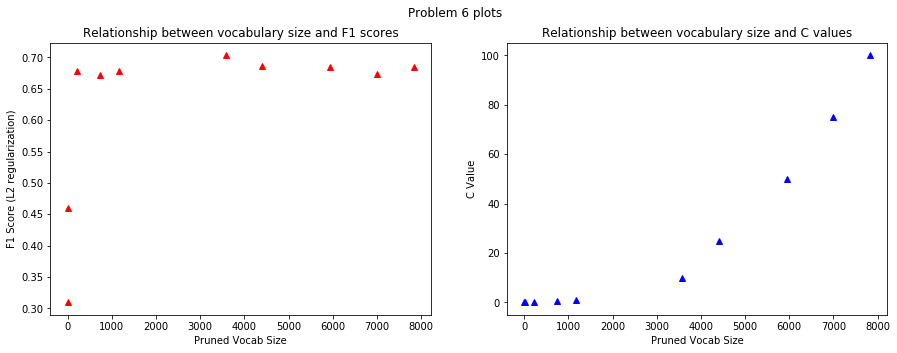

In [16]:
def P6():
  # Keep this random seed here to make comparison easier.
  np.random.seed(0)

  ### STUDENT START ###

  ##Part 1: Run logistic regression with L1 penalty (tol set to .015 as per notes)
  vectorizer_6 = CountVectorizer()

  feature_vectors_train = vectorizer_6.fit_transform(raw_documents=train_data) #fit transform train data
  feature_vectors_dev = vectorizer_6.transform(raw_documents=dev_data) #fit transform dev data

  print('***Parameters being fed in***')

  C_values = [.001,.01,.1,.5,1.0,10,25,50,75,100]

  print("C Values: " + str(C_values))

  tol_val = .015

  print("tol value set to: " + str(tol_val))

  solver_val = 'liblinear'

  print("solver type set to: " + str(solver_val))

  #create empty lists of pruned vocab sizes, l1 accuracies, l2 accuracies to append to
  pruned_vocab_sizes = []
  l1_f1s = []
  l2_f1s = []

  ######loop through each value of C######
  for C_value in C_values:
    print("*****C Value: " + str(C_value) + "*****")
    logistic_l1 = LogisticRegression(penalty='l1', tol=tol_val, C=C_value,solver = solver_val, multi_class = 'auto')
    logistic_l1.fit(feature_vectors_train, train_labels)
    l1_coef = logistic_l1.coef_

    ##grab non zero features using boolean mask##

    non_zero_features_l1 = []

    for category in l1_coef:
      for i, v in np.ndenumerate(category):
        if v != 0 and i[0] not in non_zero_features_l1:
          #print((i[0], v))
          non_zero_features_l1.append(i[0])
    non_zero_features_l1.sort()    

    boolean_mask = (logistic_l1.coef_ != 0) #create a boolean mask

    flattened_boolean_mask = boolean_mask.any(axis = 0) #flattened boolean mask

    feature_vectors_train_pruned = feature_vectors_train[:,flattened_boolean_mask] #apply boolean mask
    feature_vectors_dev_pruned = feature_vectors_dev[:,flattened_boolean_mask] #apply boolean mask

    ##Unpruned##
    default_vocabulary_size = feature_vectors_dev.shape[1]
    print("Unpruned vocabulary size: " + str(default_vocabulary_size))


    ##Pruned##
    pruned_vocabulary_size = feature_vectors_train_pruned.shape[1]
    print("Pruned vocabulary size: " + str(pruned_vocabulary_size)) 
    pruned_vocab_sizes.append(pruned_vocabulary_size)


    prediction_logistic = logistic_l1.predict(feature_vectors_dev)

    print("F1 score of Logistic L1: " + str(metrics.f1_score(dev_labels, prediction_logistic, average='weighted')))

    l1_f1s.append(metrics.f1_score(dev_labels, prediction_logistic, average='weighted'))  #append to array to plot later

    ## next - loop through and only select features that match up with indexes from all_features_w_non_zero_weights_l1

    ##Part 2: Run logistic regression with L2 penalty (tol set to .015 as per notes) 

    logistic_l2 = LogisticRegression(penalty='l2', tol=tol_val, C=C_value, solver= solver_val, multi_class = 'auto')    

    logistic_l2.fit(feature_vectors_train_pruned, train_labels)
    l2_coef = logistic_l2.coef_

    prediction_logistic_l2 = logistic_l2.predict(feature_vectors_dev_pruned)

    print("F1 score of Logistic L2 (with pruned vocabulary): " + str(metrics.f1_score(dev_labels, prediction_logistic_l2, average='weighted')))    
    l2_f1s.append(metrics.f1_score(dev_labels, prediction_logistic_l2, average='weighted')) #append to array to plot later


  print("Pruned vocabulary sizes: " + str(pruned_vocab_sizes))

  #####Making plots#####

  fig = plt.figure(figsize =(15,5)) #plot size

  fig.suptitle("Problem 6 plots") #superimposed plot title

  ##defining subplots
  ax1 = fig.add_subplot(121) 
  ax1.title.set_text('Relationship between vocabulary size and F1 scores')
  ax1.set_xlabel('Pruned Vocab Size')
  ax1.set_ylabel('F1 Score (L2 regularization)')

  ax2 = fig.add_subplot(122)
  ax2.title.set_text('Relationship between vocabulary size and C values')
  ax2.set_xlabel('Pruned Vocab Size')
  ax2.set_ylabel('C Value')

  #setting arrays
  x1 = np.array(pruned_vocab_sizes)
  y1 = np.array(l2_f1s)
  y2 = np.array(C_values)

  #plot
  ax1.plot(x1,y1, 'r^')
  ax2.plot(x1,y2, 'b^')
  ### STUDENT END ###

P6()

### Part 7:

Use the TfidfVectorizer -- how is this different from the CountVectorizer? Train a logistic regression model with C=100.

Make predictions on the dev data and show the top 3 documents where the ratio R is largest, where R is:

maximum predicted probability / predicted probability of the correct label

What kinds of mistakes is the model making? Suggest a way to address one particular issue that you see.

F1 score of Logistic w/ C = 100: 0.7597662427853104
**********Labels**********
Index Number = 0 alt.atheism
Index Number = 1 comp.graphics
Index Number = 2 sci.space
Index Number = 3 talk.religion.misc
**********Classification Report**********
              precision    recall  f1-score   support

           0       0.69      0.62      0.65       165
           1       0.80      0.91      0.85       185
           2       0.83      0.83      0.83       199
           3       0.68      0.64      0.66       127

    accuracy                           0.76       676
   macro avg       0.75      0.75      0.75       676
weighted avg       0.76      0.76      0.76       676

**********Confusion Matrix**********


<Figure size 432x288 with 0 Axes>

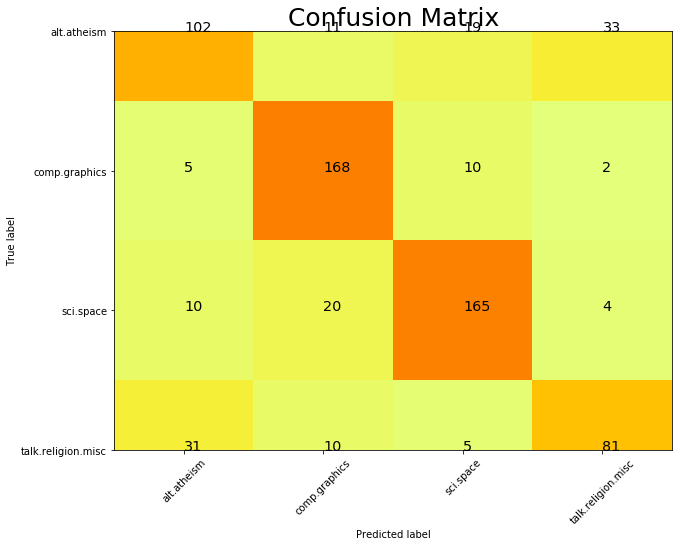

**********5 Features With the Largest Weights for Each Label - Unigram Features**********
     top_words  index  alt.atheism  comp.graphics  sci.space  talk.religion.misc
0      atheism   3866     9.199022      -3.641100  -3.318530           -4.959453
1     atheists   3870     8.165070      -1.224380  -2.408631           -6.295481
2     religion  20430     7.794195      -4.366991  -6.121419           -0.286827
3        bobby   4784     7.349448      -1.825731  -2.759408           -4.105383
4        islam  13668     7.046913      -1.672601  -2.955337           -3.515403
5     graphics  11552    -5.629298      14.064670  -9.438013           -5.614269
6        image  12769    -4.211604      10.115288  -6.152005           -3.481516
7     computer   6555    -0.649767       8.913767  -5.334696           -4.108922
8         file  10376    -2.456867       8.884874  -5.710796           -4.674778
9           3d   1145    -2.846501       8.711330  -5.313360           -2.899798
10       space  225

In [17]:
import pandas as pd
def P7():
### STUDENT START ###

  ####using TfidfVectorizer####
  vectorizer_tfidf = TfidfVectorizer()
  
  Feature_vectors_train_tfidf = vectorizer_tfidf.fit_transform(raw_documents=train_data)
  Feature_vectors_test_tfidf = vectorizer_tfidf.transform(raw_documents=dev_data)

  logistic = LogisticRegression(penalty='l2', C = 100, solver= 'liblinear', multi_class = 'auto')

  logistic.fit(Feature_vectors_train_tfidf, train_labels)
  
  prediction_logistic = logistic.predict(Feature_vectors_test_tfidf)
  
  print("F1 score of Logistic w/ C = 100: " + str(metrics.f1_score(dev_labels, prediction_logistic, average='weighted')))
  
  ####Max Predicted Probability####
  tfidf_proba = logistic.predict_proba(Feature_vectors_test_tfidf)
  
  max_predicted_probability = []
  
  for i in tfidf_proba:
    max_predicted_probability.append(np.max(i))
    
  ####Predicted Probability of correct label####
  
  correct_label_probabilities = []
  
  for i,v in np.ndenumerate(dev_labels):
    index_num = i[0]
    correct_label_probabilities.append(tfidf_proba[index_num][v]) #specify correct item in array

  #print(correct_label_probabilities)
  

  ####Calculate R for each item in dev_label#### 
  R = []
  
  for i, v in enumerate(max_predicted_probability):
    R.append((v/ correct_label_probabilities[i], i))
  #R = [m / c for m,c in zip(max_predicted_probability, correct_label_probabilities)]
  #print(R)
  
 
  #sort this list of tuples to find some of the max values of R
  
  sorted_by_first = sorted(R, key=lambda tup: tup[0], reverse=True)
  #print(sorted_by_first)   
  
  print('**********Labels**********')
  for i, v in enumerate(newsgroups_train.target_names):
    print('Index Number = ' + str(i) + ' ' + v)

  ###classification report###
  
  
  print('**********Classification Report**********')
  print(classification_report(dev_labels,prediction_logistic))
  
  print('**********Confusion Matrix**********')
  cm = metrics.confusion_matrix(dev_labels, prediction_logistic)
  plt.clf()
  plt.figure(figsize=(10,10))
  plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
  classNames = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
  plt.title('Confusion Matrix', fontsize = 25)
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  tick_marks = np.arange(len(classNames))
  plt.xticks(tick_marks, classNames, rotation=45)
  plt.yticks(tick_marks, classNames)
  s = [['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc'], 
       ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc'],
       ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc'], 
       ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']
      ]

  for i in range(4):
      for j in range(4):
          plt.text(j,i, str(cm[i][j]), size='x-large')
  plt.show()

  
  #####top unigram features
  
  master_list = []
  top_words = []
  index_list = []
  label_0_weights = []
  label_1_weights = []
  label_2_weights = []
  label_3_weights = []
  feature_names = vectorizer_tfidf.get_feature_names()
  
  #top feature list
  for j in logistic.coef_:
    weight_index_list = []
    word_list = []
    #loop through the weights for each label
    for i, v in np.ndenumerate(j):
      index = i[0]
      value = v.tolist()
      weight_index_list.append((index, value)) #append the index and values into a tuple
    sorted_by_weight = sorted(weight_index_list, key=lambda tup: tup[1], reverse=True)[0:5] #sort appended list by feature, return top 5 words for each feature
    for i in sorted_by_weight:
      top_words.append(feature_names[i[0]]) 
      index_list.append(i[0])
      label_0_weights.append(logistic.coef_[0][i[0]])
      label_1_weights.append(logistic.coef_[1][i[0]])
      label_2_weights.append(logistic.coef_[2][i[0]])
      label_3_weights.append(logistic.coef_[3][i[0]])
    #top_words.append(word_list)
    
    master_list.append(sorted_by_weight)

  
  #display options for pandas to show table nicely
  pd.set_option('display.max_columns', 500)
  pd.set_option('display.width', 1000)
  
  #initialize data structure to output to table
  table_data = {'top_words': top_words, 'index': index_list, 'alt.atheism': label_0_weights, 'comp.graphics': label_1_weights , 'sci.space': label_2_weights, 'talk.religion.misc' : label_3_weights}
  table_data_df = pd.DataFrame.from_dict(table_data)
  
  print("**********5 Features With the Largest Weights for Each Label - Unigram Features**********")
  print(table_data_df)
  
  
  
  ###print top 3 items###
  print("**********Examining dev data with highest R values**********")
  for i in range(0,3):
    print("*****R score and dev data index for: " + str(sorted_by_first[i]) + ", R value rank: " + str(i+1) + "*****")
    print("Actual Label: "+ str(dev_labels[sorted_by_first[i][1]]) + " " + str(newsgroups_train.target_names[dev_labels[sorted_by_first[i][1]]]))
    print("Predicted Label: "+ str(prediction_logistic[sorted_by_first[i][1]]) + " " + str(newsgroups_train.target_names[prediction_logistic[sorted_by_first[i][1]]]))
    print("Text of item:")
    print(dev_data[sorted_by_first[i][1]])
    
## STUDENT END ###
P7()

ANSWER: CountVectorizer just counts the word frequencies, whereas TFIDFVectorizer, the value increases proportionally to the count, but is offset by the frequency of the word in the dictionary. This helps to adjust for the fact that some words might appear more frequently. 

The item at 215 contains keywords that relate to both religion as well as computers (ftp, Mormon). 

The item at index 665 is relatively short. It contains keywords that relate to both religion as well as computers (ftp, Mormon). This item could be misclassified by a human

The item at index 607 appears to have the highest R score (55308136). The length of this text is also relatively short. This one might easily be misclassified by a human as well.

From our classification report, we can see that alt.atheism and talk.religion.misc have the lowest F1 scores. Based on the confusion matrix, it appears that alt.atheism and talk.religion.misc both appear to have messages that are mixed between groups.

A possible solution might be to remove features/words from our vocabulary that are common in both atheism and talk.religion.misc, as well as other highly misclassifed topic combinations that we can identify from the confusion matrix. We can also try to perform preprocessing and common stop words in order to better improve the overall classification.

### Part 8 EXTRA CREDIT:

Try implementing one of your ideas based on your error analysis. Use logistic regression as your underlying model.

In [18]:
##Let's look at stop words
##I will include common stop words provided in scikitlearn, as well as custom stop words. 
#I'll be looking at features that are strong predictors for more than 1 class, and purging those from my classifier
##I tried a couple othere examples, like preprocessing, lemmatization, and bigram/trigrams 
#but stop words and preprocessing provided the best jump in performance that I could find

def better_preprocessor(s):
  #applying different text transformations
  s = re.sub('[^A-Za-z0-9]', ' ', s) #remove non alpha numeric characters
  s = re.sub('[/\r?\n|\r/]', ' ', s) #remove line breaks
  #s = re.sub("(\w{7})\w+", "\\1", s) #shortening long words
  #s = re.sub('([0-9]+)', '#', s) #numbers
  return s

def P8():
  ###Initialize vectorizer###
  vectorizer_tfidf_pre = TfidfVectorizer()
  
  #fit vectors
  Feature_vectors_train_tfidf_pre = vectorizer_tfidf_pre.fit_transform(raw_documents=train_data)
  Feature_vectors_dev_tfidf_pre = vectorizer_tfidf_pre.transform(raw_documents=dev_data)
  
  ####fit model on and look for common strong unigram weights####
  
  logistic = LogisticRegression(penalty='l2', C = 100, solver= 'liblinear', multi_class = 'auto')

  logistic.fit(Feature_vectors_train_tfidf_pre, train_labels)
  
  #####top unigram features#####
  
  master_list = []
  top_words_per_class = [] #append top 50 feature words, for 4 classes in 4 lists
  top_words_comprehensive = [] #append top 50 feature words into one big list

  feature_names = vectorizer_tfidf_pre.get_feature_names()
  
  #top feature list
  for j in logistic.coef_:
    weight_index_list = []
    top_word_list = []
    #loop through the weights for each label
    for i, v in np.ndenumerate(j):
      index = i[0]
      value = v.tolist()
      weight_index_list.append((index, value)) #append the index and values into a tuple
    sorted_by_weight = sorted(weight_index_list, key=lambda tup: tup[1], reverse=True)[0:500] #sort appended list by feature, return top 300 words for each feature
    for i in sorted_by_weight:
      top_word_list.append(feature_names[i[0]])  #top 50 features for our keywords to print to table
      top_words_comprehensive.append(feature_names[i[0]])
    top_words_per_class.append(top_word_list)
    master_list.append(sorted_by_weight)

  
  #display options for pandas to show table nicely
  pd.set_option('display.max_columns', 500)
  pd.set_option('display.max_rows', 100)
  pd.set_option('display.width', 1000)
  
  #initialize data structure to output to table
  table_data = {'alt.atheism': top_words_per_class[0][0:50], 'comp.graphics': top_words_per_class[1][0:50] , 'sci.space': top_words_per_class[2][0:50], 'talk.religion.misc' : top_words_per_class[3][0:50]}
  table_data_df = pd.DataFrame.from_dict(table_data)
  #print(top_words_per_class)
  #print(top_words_comprehensive)
  
  print("**********Top 50 Strongest features for each class**********")
  print(table_data_df)
  
  print("**********Common stop Words that show up in our top 500 strongest features for each class**********")  
  matching_stop_words = []
  for i in ENGLISH_STOP_WORDS:
    if i in top_words_comprehensive:
      matching_stop_words.append(i)
  print(matching_stop_words)
    
  
  #####Let's also look at commonly overlapping words in our corpus that are strong predictors for 2 classes#####
  
  #let's look at the 500 top features for alt.atheism, talk.religion.misc, comp graphics, and sci.space

  alt_atheism_list = [] 
  for i in master_list[0]:
    alt_atheism_list.append(i[0])
  
  talk_religion_misc_list = [] 
  for i in master_list[3]:
    talk_religion_misc_list.append(i[0])  
    
  comp_graphics_list = [] 
  for i in master_list[1]:
    comp_graphics_list.append(i[0])
  
  sci_space_list = [] 
  for i in master_list[2]:
    sci_space_list.append(i[0])     
  
  
  #commonly overlapping word combinations. I picked out a few combinations based on the most confused combinations based on the confusion matrix
  print("***Strong feature words that are common in both alt.atheism and talk.religion.misc***")
  overlapping_indicies1 = list(set(alt_atheism_list) & set(talk_religion_misc_list)) #intersection indicies - words that are common in both alt atheism and talk religion misc
  
  overlapping_words1 = []
  for i in overlapping_indicies1:
    overlapping_words1.append(feature_names[i]) 
  print(overlapping_words1)
  
  print("***Strong feature words that are common in both sci.space and comp.graphics***")
  overlapping_indicies2 = list(set(comp_graphics_list) & set(sci_space_list)) 

  overlapping_words2 = []
  for i in overlapping_indicies2:
    overlapping_words2.append(feature_names[i]) 
  print(overlapping_words2)
 

  print("***Strong feature words that are common in both talk.religion.misc and comp.graphics***")
  overlapping_indicies3 = list(set(comp_graphics_list) & set(talk_religion_misc_list)) 

  overlapping_words3 = []
  for i in overlapping_indicies3:
    overlapping_words3.append(feature_names[i]) 
  print(overlapping_words3)
  
  print("***Strong feature words that are common in both alt_atheism and sci.space***")
  overlapping_indicies4 = list(set(alt_atheism_list) & set(sci_space_list)) 

  overlapping_words4 = []
  for i in overlapping_indicies4:
    overlapping_words4.append(feature_names[i]) 
  print(overlapping_words4)  
  
  
  print("***Common Stop Words provided by sklearn that we will filter on***")
  print(ENGLISH_STOP_WORDS)
  
  ####part 2 - Apply stopword transformations and vocab processing####
   
  print("******Model evaluation******")
  
  ##combined stopwords
  
  overlapping_words = overlapping_words1 + overlapping_words2 + overlapping_words3 + overlapping_words4
  updated_stop_words = ENGLISH_STOP_WORDS.union(overlapping_words)
  
  #initialize new vectorizer utilizing our updated stop words
 
  vectorizer_tfidf = TfidfVectorizer(lowercase = True,
                                    stop_words = updated_stop_words
                                    )
  
  ##apply preprocessing
  train_data2 = train_data.copy() #create a copy to apply pruning to

  #apply preprocessing to each item - train
  for i, v in enumerate(train_data2):
    train_data2[i] = better_preprocessor(v)
    
  dev_data2 = dev_data.copy() #create a copy to apply pruning to
 
  #apply preprocessing to each item - dev
  for i, v in enumerate(dev_data2):
    dev_data2[i] = better_preprocessor(v)  
    
    
  test_data2 = test_data.copy() #create a copy to apply pruning to
 
  #apply preprocessing to each item - test
  for i, v in enumerate(test_data2):
    test_data2[i] = better_preprocessor(v)  
  
  
  #create new feature vectors
  Feature_vectors_train_tfidf = vectorizer_tfidf.fit_transform(raw_documents=train_data2)
  Feature_vectors_test_tfidf = vectorizer_tfidf.transform(raw_documents=test_data2)
  Feature_vectors_dev_tfidf = vectorizer_tfidf.transform(raw_documents=dev_data2)
  
  #no transformations on dev  
  logistic1 = LogisticRegression(penalty='l2', C = 100, solver= 'liblinear', multi_class = 'auto')
  logistic1.fit(Feature_vectors_train_tfidf_pre, train_labels)
  prediction_logistic1 = logistic1.predict(Feature_vectors_dev_tfidf_pre)
  print("F1 score of Logistic w/ no purging, evaluated on dev: " + str(metrics.f1_score(dev_labels, prediction_logistic1, average='weighted')))
  
  #refit model on dev  
  logistic2 = LogisticRegression(penalty='l2', C = 100, solver= 'liblinear', multi_class = 'auto')
  logistic2.fit(Feature_vectors_train_tfidf, train_labels)
  prediction_logistic2 = logistic2.predict(Feature_vectors_dev_tfidf)
  print("F1 score of Logistic w/ purged stop words and text tranformations, evaluated on dev: " + str(metrics.f1_score(dev_labels, prediction_logistic2, average='weighted')))
  
  #refit model on test
  logistic3 = LogisticRegression(penalty='l2', C = 100, solver= 'liblinear', multi_class = 'auto')
  logistic3.fit(Feature_vectors_train_tfidf, train_labels)
  prediction_logistic3 = logistic3.predict(Feature_vectors_test_tfidf)
  print("F1 score of Logistic w/ purged stop words and text tranformations, evaluated on test: " + str(metrics.f1_score(test_labels, prediction_logistic3, average='weighted')))
P8()

**********Top 50 Strongest features for each class**********
     alt.atheism comp.graphics   sci.space talk.religion.misc
0        atheism      graphics       space          christian
1       atheists         image       orbit              blood
2       religion      computer        nasa         christians
3          bobby          file      launch                fbi
4          islam            3d  spacecraft              order
5        atheist        points        moon             christ
6          motto            hi        mars             hudson
7        islamic            42     shuttle             koresh
8          nanci           sgi          dc              jesus
9   enviroleague         files        nick           children
10      deletion          code       allen          objective
11       matthew           3do       solar           abortion
12         loans         using         sci          terrorist
13         satan        screen      flight        rosicrucian
14       

ANSWER: By purging common stop words from our corpus, lowercasing all the text in our vectorizer, as well as stop words that are common in multiple classes, I was able to improve the F1 score from #7 by approximately 1.6% when compared to dev (75.9% -> 77.5%) and 2.2% compared to test (75.9% -> 78.1%), everything else remaining equal (F1 scores may change slightly upon rerunning).

We can also see that there are quite a few common stop words that will be purged when we implement a stopword filter.